#1.4.10 Histograms in OpenCV

#Histograms - 1 : Find, Plot, Analyze !!!

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
img = cv2.imread('mountain.jpeg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [6]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

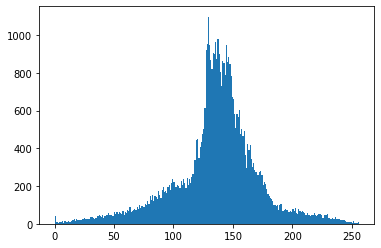

In [7]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [8]:
hist

array([  42,    8,    8,    6,    8,    9,   13,    4,   14,   17,   10,
         14,   10,   11,   17,   22,   24,   15,   28,   22,   18,   22,
         20,   23,   25,   29,   25,   24,   24,   28,   36,   36,   31,
         28,   29,   32,   40,   46,   39,   36,   46,   31,   43,   46,
         47,   59,   45,   49,   42,   41,   65,   50,   61,   51,   65,
         58,   53,   67,   45,   62,   57,   72,   70,   87,   60,   66,
         75,   79,   72,   87,   81,   97,   83,   94,   89,   89,  106,
         99,  121,  106,  149,  124,  151,  120,  147,  140,  131,  175,
        150,  139,  179,  195,  166,  172,  163,  197,  207,  178,  215,
        236,  224,  196,  197,  206,  200,  187,  229,  206,  236,  215,
        187,  244,  206,  237,  216,  250,  263,  336,  337,  443,  451,
        350,  406,  431,  478,  503,  613,  920,  953, 1097,  948,  867,
        820,  907,  901,  965,  873,  980,  901,  805,  731,  860,  852,
        787,  948,  857,  881,  848,  784,  674,  6

In [13]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [20]:
img = cv2.imread('mountain.jpeg')
color = ('b','g','r')

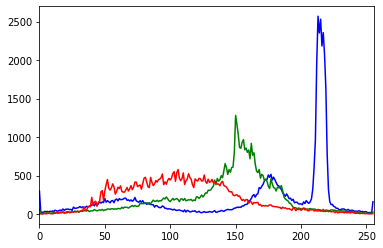

In [21]:
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Histograms - 2: Histogram Equalization

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [24]:
img = cv2.imread('mountain.jpeg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

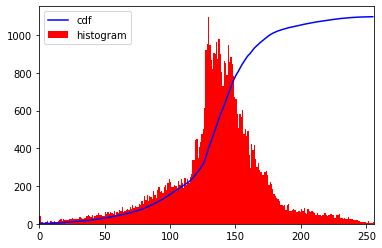

In [25]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [26]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [27]:
img2 = cdf[img]

In [28]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

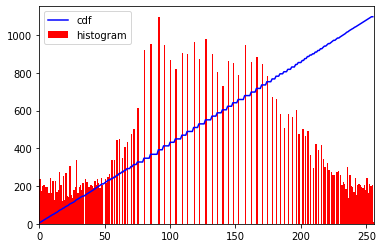

In [29]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Histograms Equalization in OpenCV

In [31]:
img = cv2.imread('mountain.jpeg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

In [34]:
img = cv2.imread('res.png',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

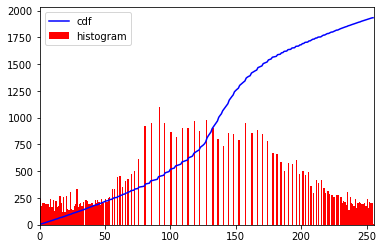

In [35]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Histograms - 3 : 2D Histograms

In [36]:
import cv2
import numpy as np

In [37]:
img = cv2.imread('mountain.jpeg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

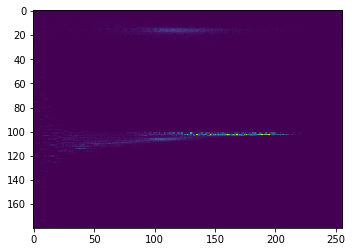

In [38]:
plt.imshow(hist,interpolation = 'nearest')
plt.show()

Histogram - 4 : Histogram Backprojection

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [40]:
#roi is the object or region of object we need to find
roi = cv2.imread('res.png')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

In [41]:
#target is the image we search in
target = cv2.imread('res.png')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

In [42]:
# Find the histograms using calcHist. Can be done with np.histogram2d also
M = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
I = cv2.calcHist([hsvt],[0, 1], None, [180, 256], [0, 180, 0, 256] )

In [ ]:
img = cv2.imread('wiki.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)